# Project - Sprocket Central Pty Ltd

## Task 1 - Identify the data quality issues and how this may impact our analysis going forward

The first Step of ETL will be done observing the Standard Data Quality Dimensions
- Accuracy
- Completeness
- Consistency 
- Validity
- Uniqueness

#### 1) Loading and Understanding the dataset

You decide to start the preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.

In [48]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno
from datetime import datetime
import numpy as np

#### a) Customer Demographic and Addresses

#### Loading the customer demographic and address

In [88]:
# Loading the customer demographic
df_customer_demog = pd.read_excel('Files/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=3, header=1, usecols='A:M')
print(f'Total customer: {len(df_customer_demog)}')

# Loading the customer address
df_customer_address = pd.read_excel('Files/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=4, header=1, usecols='A:F')
print(f'Total customer´s address: {len(df_customer_address)}')

# merge info from customer
df_customer = pd.merge(df_customer_demog,df_customer_address, how='inner', on='customer_id')
df_customer.set_index('customer_id')


Total customer: 4000
Total customer´s address: 3999


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4
6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,0 Transport Center,3977,VIC,Australia,6
3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,4 Dovetail Crossing,2350,NSW,Australia,2
3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,736 Roxbury Junction,2540,NSW,Australia,6


In [50]:
# show after merge only customer with address
df_customer.shape

(3996, 18)

In [51]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 3995
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3996 non-null   int64         
 1   first_name                           3996 non-null   object        
 2   last_name                            3871 non-null   object        
 3   gender                               3996 non-null   object        
 4   past_3_years_bike_related_purchases  3996 non-null   int64         
 5   DOB                                  3909 non-null   datetime64[ns]
 6   job_title                            3492 non-null   object        
 7   job_industry_category                3341 non-null   object        
 8   wealth_segment                       3996 non-null   object        
 9   deceased_indicator                   3996 non-null   object        
 10  default     

In [52]:
# % of columns without values
df_customer.isna().sum() / len(df_customer) * 100

customer_id                             0.000000
first_name                              0.000000
last_name                               3.128128
gender                                  0.000000
past_3_years_bike_related_purchases     0.000000
DOB                                     2.177177
job_title                              12.612613
job_industry_category                  16.391391
wealth_segment                          0.000000
deceased_indicator                      0.000000
default                                 7.557558
owns_car                                0.000000
tenure                                  2.177177
address                                 0.000000
postcode                                0.000000
state                                   0.000000
country                                 0.000000
property_valuation                      0.000000
dtype: float64

In [53]:
# let´s check the age of customers
now = pd.Timestamp('now')
df_customer['age'] = (now - df_customer['DOB']).astype('<m8[Y]')    
# creating a group of age
df_customer['group_age'] = np.floor(df_customer['age'] / 10) *10

#### Cleaning/Transforming some data from df_customer

In [54]:
# Let´s check the genders
df_customer.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [55]:
# let´s standardize genders
df_customer['gender'] = df_customer['gender'].map({'F':'Female','Femal':'Female','Female':'Female','M':'Male','Male':'Male','U':'Unknown'})

In [56]:
# Let´s check the states
df_customer.state.unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [57]:
# let´s standardize the states
df_customer['state'] = df_customer['state'].map({'NSW':'NSW', 'New South Wales':'NSW','QLD':'QLD','Victoria':'VIC','VIC':'VIC'})

In [58]:
# Is any customer´s age more than 120 years old 
df_customer[df_customer['age'] > 120]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,age,group_age
29,34,Jephthah,Bachmann,Unknown,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,833 Luster Way,4005,QLD,Australia,8,177.0,170.0


In [59]:
# Let´s drop the age more than 120
df_customer.drop(df_customer[df_customer['age'] > 120].index, inplace=True)

# drop column default that are with no relevant information and deceased_indicator that are all set with 'N' 
df_customer.drop(['default','deceased_indicator'], axis=1, inplace=True)

In [60]:
df_customer.shape

(3995, 18)

<AxesSubplot:>

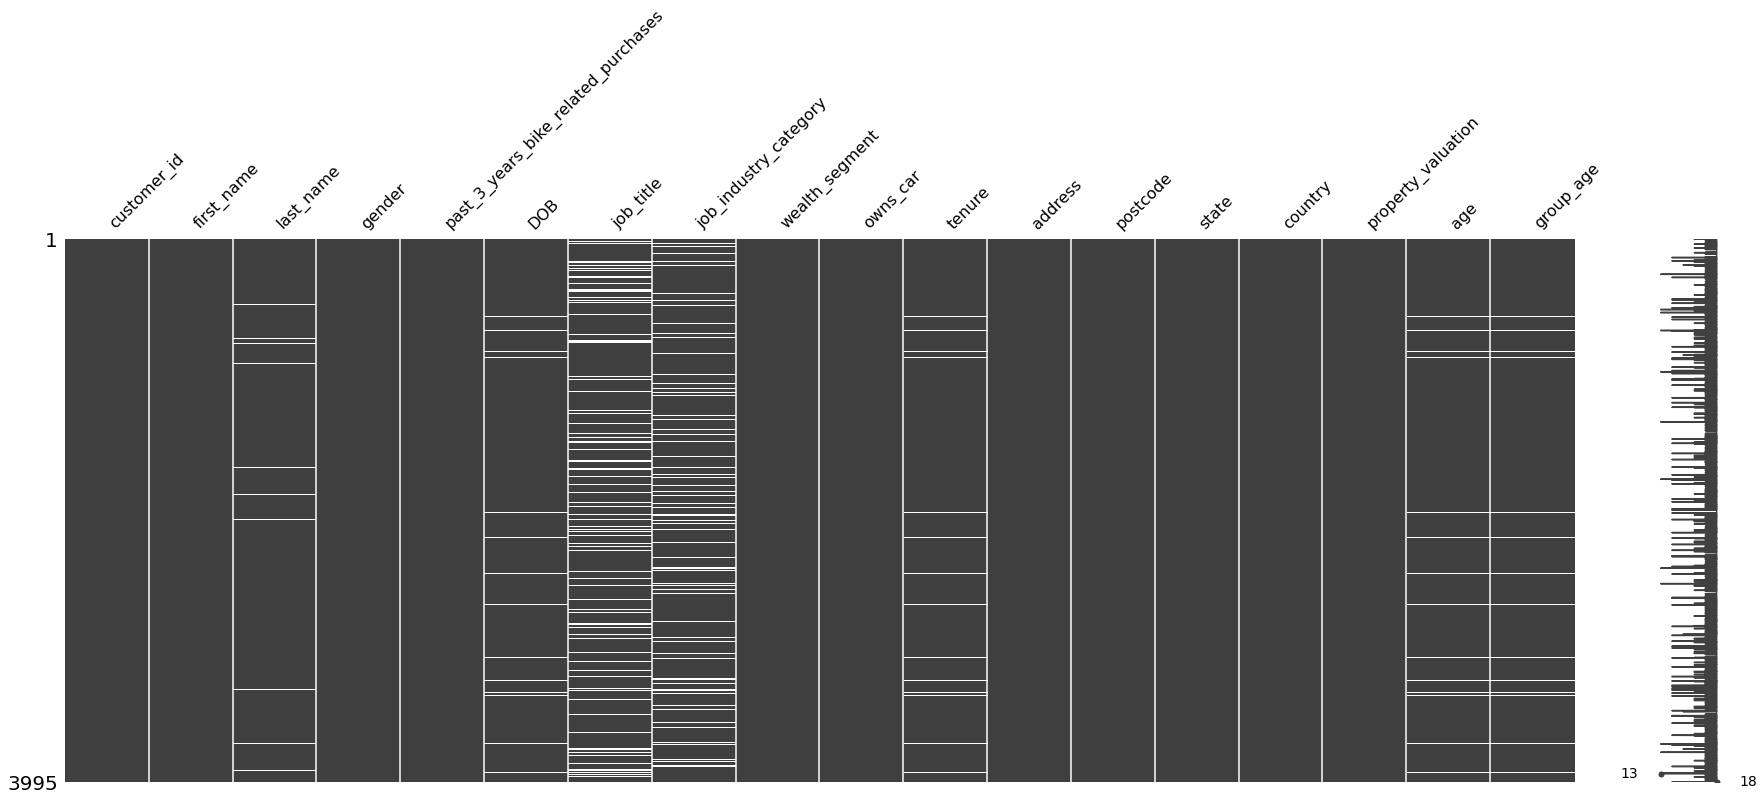

In [61]:
# visualizing if it has null values
missingno.matrix(df_customer, figsize=(30,10))

## *Information checked from Customer*
- We have 3 customer(4001,4002,4003) with no basic information in Customer Demographic dataset(name, age, job...) so they will be ignored
- Some fields are empty as last name, dob, job, tenure.
- Found 1 customer with 177 years old, so it will be ignored
- We have 1 field called default and  that has no relevant information, so it will be ignored
- The field(column) State and gender have some inconsistency. Same type with different names. 

    For example: Gender: Male/M, Female/F/Femal, U and  
                 State: New South Wales/NSW, Victoria/VIC

#### b) Customer Transactions

#### Loading the customer transactions

In [62]:
# the column N is ignored - is empty
df_customer_trans = pd.read_excel('Files/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=1, header=1, usecols='A:M')

In [63]:
df_customer_trans.shape

(20000, 13)

In [64]:
df_customer_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [65]:
# % of columns without values
df_customer_trans.isna().sum() / len(df_customer_trans) * 100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [66]:
df_customer_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


#### Cleaning/Transforming some data from df_customer_trans

In [67]:
# Let´s check the order_status
df_customer_trans.order_status.unique()

array(['Approved', 'Cancelled'], dtype=object)

In [68]:
# Let´s check the brand
df_customer_trans.brand.unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

In [69]:
# Let´s check the online_order
df_customer_trans.online_order.unique()

array([ 0.,  1., nan])

In [70]:
# Let´s replace the online_order as 0 - No, 1-Yes, 2-Unknown
df_customer_trans['online_order'] = df_customer_trans['online_order'].map({0:0, 1:1, np.nan:2})

In [71]:
# Let´s check the Null values of transactions
df_customer_trans[df_customer_trans['brand'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,1,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


In [72]:
# Let´s drop the transactions with no brand(all brand with no values will be ignored)
df_customer_trans.drop(df_customer_trans[df_customer_trans['brand'].isnull()].index, inplace=True)

In [73]:
# Let´s change the format of product_first_sold_date
df_customer_trans['product_first_sold_date'] = pd.TimedeltaIndex(df_customer_trans['product_first_sold_date'],unit = 'd') + datetime(1900,1,1)
df_customer_trans.product_first_sold_date

0       2012-12-04
1       2014-03-05
2       1999-07-22
3       1998-12-18
4       2015-08-12
           ...    
19995   2003-07-23
19996   1997-05-12
19997   2010-08-22
19998   2004-08-19
19999   1999-06-25
Name: product_first_sold_date, Length: 19803, dtype: datetime64[ns]

In [81]:
df_customer_trans.shape

(19803, 13)

<AxesSubplot:>

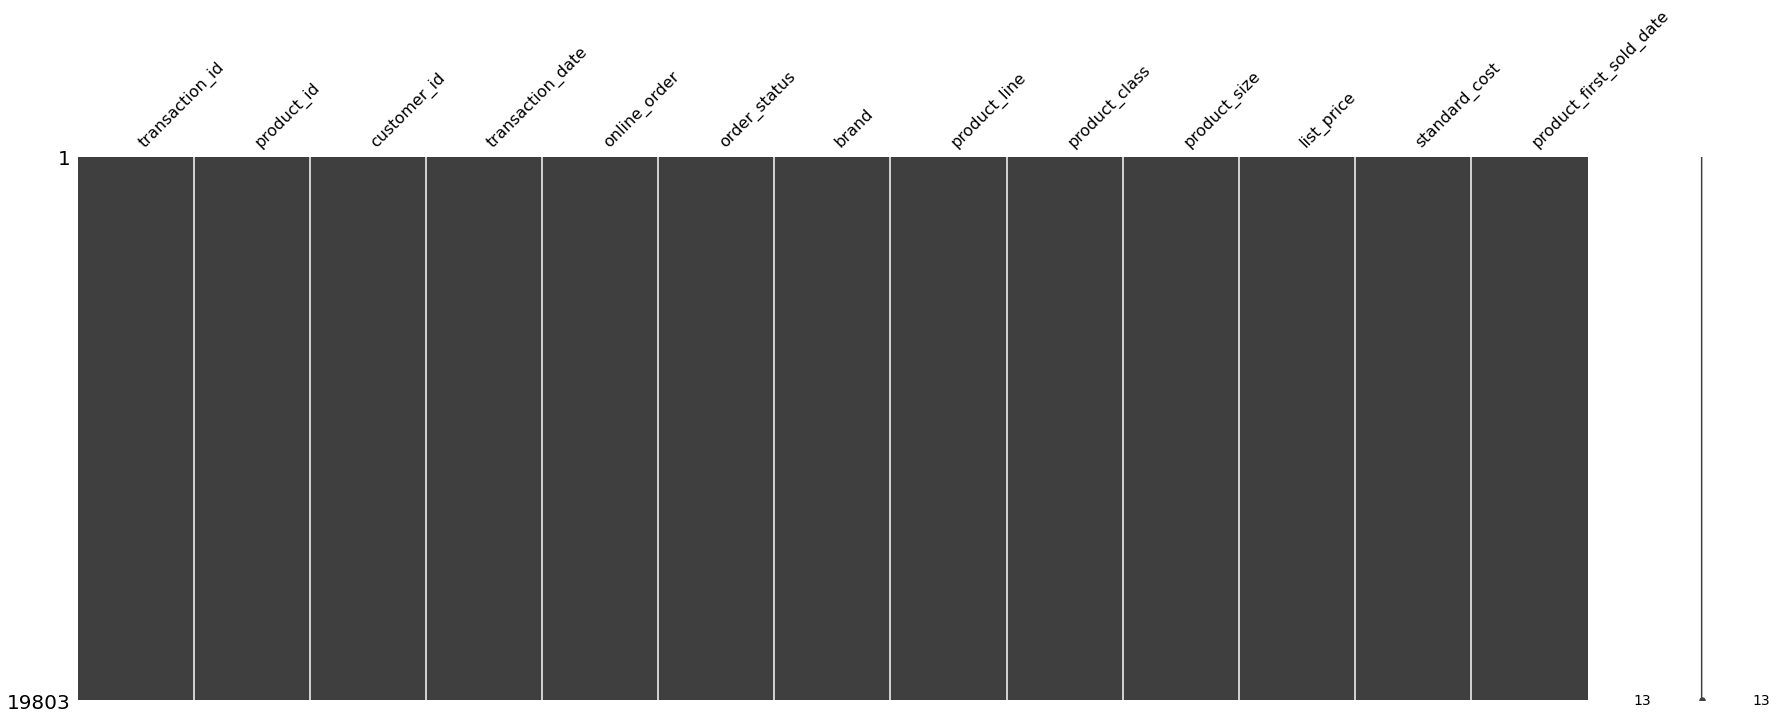

In [74]:
# visualizing if it has null values
missingno.matrix(df_customer_trans, figsize=(30,10))

In [75]:
df_customer_trans['brand'].value_counts() 

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [76]:
df_customer_trans['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [77]:
df_customer_trans['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [78]:
df_customer_trans['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [87]:
len(df_customer_trans['customer_id'].unique())

3494

## *Information checked from Transactions*
- We have 1 customer(5034) not found in Customer Demographic/Address dataset(name, age, job...), so it will be ignored
- Some column online_order has null values and it will be set with type 2-Unknown
- Some fields as brand, product line, class and size are empty, so they will be ignored
- The field product_first_sold_date was changed to date format

#### Saving the cleaned dataset

In [79]:
with pd.ExcelWriter('Files/KPMG_Sprocket_cleaned.xlsx') as f:  
    df_customer.to_excel(f, sheet_name='Customer',index=False)
    df_customer_trans.to_excel(f, sheet_name='Transactions',index=False)

## Task 1 - Last step of this task is to send an e-mail with the issues that were found in the dataset
### Draft an email to the client identifying the data quality issues and strategies to mitigate these issues. Refer to ‘Data Quality Framework Table’ and resources below for criteria and dimensions which you should consider.


In [80]:
from IPython.display import IFrame
IFrame("Files/Task1-answer.pdf", width=900, height=500)
